# ZwiftTraining

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [74]:
import numpy as np
import os
import pandas as pd
from ztraining import ZwiftTraining

## Initialization

In [3]:
zt = ZwiftTraining('benny.json', quiet=False)

Zwift login: benny.prijono@gmail.com
Profile data directory: /home/bennylp/Desktop/Google Drive/My Drive/Personal/Cycling/zwift_training_1


## Initial Imports
### Import TCX, GPX, and FIT Files from a Directory

In [72]:
def import_my_files():
    import_dir = '/home/bennylp/Desktop/Google Drive/My Drive/Personal/Cycling/activities-files/import'
    zt.import_files(import_dir, overwrite=False, quiet=False)
    
    import_dir = '/home/bennylp/Desktop/Google Drive/My Drive/Personal/Cycling/activities-files/zwift-import'
    zt.import_files(import_dir, overwrite=False, quiet=False)
    
    import_dir = '/home/bennylp/Desktop/Google Drive/My Drive/Personal/Cycling/activities-files/garmin-import/2020-05-01 - 2020-05-17'
    zt.import_files(import_dir, overwrite=False, quiet=False)

### Importing Specific File

In [75]:
def reimport_file(filename):
    dir = '/home/bennylp/Desktop/Google Drive/My Drive/Personal/Cycling/activities-files/import'
    path = os.path.join(dir, filename)
    
    df = zt.get_activities()
    df = df[ df['src_file'] == filename ]
    print('Before')
    display(df)
    
    zt.import_activity_file(path, overwrite=True, quiet=False)
    df = zt.get_activities()
    df = df[ df['src_file'] == filename ]
    print('After')
    display(df)
    
#reimport_file('1873571076.fit')

## Update from Zwift

### Update Player Data

In [5]:
zt.zwift_update(quiet=False)

Zwift local profile is up to date (last update: 2020-06-29 21:14:23)


0

### Import Activities from Zwift Website

In [95]:
zt.zwift_update(profile=False, max=0, quiet=False)

0

### Profile Information

In [101]:
pi = zt.profile_info
pi

dtime                2020-06-29 21:14:23
cycling_level                      13.59
cycling_distance                 641.983
cycling_elevation                   6217
cycling_calories                     NaN
cycling_xp                         30947
cycling_drops                      17985
ftp                                  160
weight                                83
running_level                       2.73
running_distance                   8.915
running_minutes                       95
running_xp                          1732
running_calories                     336
Name: 34, dtype: object

In [105]:
cycling_level = int(pi["cycling_level"])
xp_required = zt.get_cycling_level_xp(cycling_level+1) - pi['cycling_xp']

print(f'You are in level {cycling_level}')
print(f'You need {xp_required} XPs to level up')

You are in level 13
You need 2053 XPs to level up


### Profile History

In [7]:
zt.profile_history.tail(5)

,dtime,cycling_level,cycling_distance,cycling_elevation,cycling_calories,cycling_xp,cycling_drops,ftp,weight,running_level,running_distance,running_minutes,running_xp,running_calories
30,2020-06-24 12:00:00,12.00,549.000,5642,8721.0,26825,359031,160,82.9,NaN,NaN,NaN,NaN,NaN
31,2020-06-26 12:00:00,12.00,587.000,5944,9271.0,28551,387748,160,83.2,NaN,NaN,NaN,NaN,NaN
32,2020-06-27 12:00:00,13.00,642.000,6217,9992.0,30947,426285,160,83.0,NaN,NaN,NaN,NaN,NaN
33,2020-06-27 12:00:00,13.00,642.000,6217,9992.0,30947,17985,160,83.0,NaN,NaN,NaN,NaN,NaN
34,2020-06-29 21:14:23,13.59,641.983,6217,NaN,30947,17985,160,83.0,2.73,8.915,95.0,1732.0,336.0


## Browsing Online Zwift Account

Read online Zwift account without updating local account.

### List Online Activities

In [115]:
zt.zwift_list_activities(start=0, max=10)

,dtime,sport,title,id,duration,distance,elevation,power_avg,calories
0,2020-06-27 06:39:35,cycling,Zwift - Volcano laps,581382235002805376,02:11:22.774000,54.9,273.1,116.6,810.3
1,2020-06-26 05:49:18,cycling,Zwift - Watopia,580632099939204688,01:37:10.962000,37.9,302.9,114.3,618.4
2,2020-06-24 07:10:37,cycling,Zwift - Yorkshire,579223480630814016,01:41:34.111000,32.0,546.3,108.2,621.9
3,2020-06-22 06:32:29,cycling,Zwift - Watopia,577754733285054560,01:35:48.099000,35.6,340.3,110.9,598.8
4,2020-06-20 07:46:19,cycling,Zwift - 06/20/2020,576342344975089968,02:19:34.885000,52.9,264.1,97.6,730.0
5,2020-06-19 08:44:04,cycling,Zwift,575646638778917760,01:25:36.516000,26.3,408.5,106.1,498.9
6,2020-06-17 05:53:57,cycling,Watopia,574111459786657280,01:36:27.341000,30.4,275.5,112.3,606.4
7,2020-06-15 06:39:48,cycling,Zwift - M8070. 1:20H 70% MAF,572684986805748512,01:23:50.674000,26.1,322.4,109.1,510.9
8,2020-06-13 06:16:19,running,Zwift Run - 55 Minutes,571223613118713360,00:52:25.866000,3.6,0.0,0.0,132.1
9,2020-06-13 06:13:04,running,Zwift - 06/13/2020,571221983410296688,00:00:00,0.0,0.0,0.0,0.0


### Parse Online Activity

In [118]:
df, meta = zt.parse_zwift_activity(581382235002805376)
for key, val in meta.items():
    print(f'{key:20s}: {val}')
    
print('\nActivity data:')
display(df)

Zwift: getting activity Zwift - Volcano laps (2020-06-27 06:39:35)
dtime               : 2020-06-27 06:39:35
sport               : cycling
title               : Zwift - Volcano laps
src_file            : 581382235002805376.zwift
distance            : 54.945
duration            : 0 days 02:09:49
mov_duration        : 0 days 02:00:55
elevation           : 250.8
speed_avg           : 27.3
speed_max           : 46.4
hr_avg              : 127.33
hr_max              : 145.5
power_avg           : 116.83
power_max           : 151.5
cadence_avg         : 67.24
cadence_max         : 117.0
temp_avg            : nan
temp_max            : nan

Activity data:


,dtime,duration,mov_duration,latt,long,elevation,movement,distance,hr,cadence,speed,power,temp
0,2020-06-27 06:39:33,0.0,0,-11.639206,166.944588,10.4,1.47,0.001,69.0,25.0,5.29,32.0,NaN
1,2020-06-27 06:39:34,1.0,1,-11.639211,166.944580,10.4,1.10,0.003,70.0,25.0,4.63,33.0,NaN
2,2020-06-27 06:39:35,2.0,2,-11.639215,166.944571,10.4,1.01,0.004,70.5,25.0,4.30,18.0,NaN
8,2020-06-27 06:39:41,8.0,3,-11.639223,166.944558,10.4,0.87,0.005,69.5,31.0,1.67,44.0,NaN
9,2020-06-27 06:39:42,9.0,4,-11.639229,166.944548,10.4,1.29,0.007,69.5,35.5,3.11,47.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,2020-06-27 08:49:18,7785.0,7251,-11.645938,166.941318,10.6,4.14,54.936,127.5,0.0,18.31,0.0,NaN
7270,2020-06-27 08:49:19,7786.0,7252,-11.645966,166.941304,10.6,3.44,54.939,128.0,0.0,15.29,0.0,NaN
7271,2020-06-27 08:49:20,7787.0,7253,-11.645988,166.941293,10.6,2.70,54.942,128.0,0.0,12.34,0.0,NaN
7272,2020-06-27 08:49:21,7788.0,7254,-11.646003,166.941284,10.6,1.84,54.944,128.0,0.0,9.58,0.0,NaN


## Activities

In [112]:
zt.get_activities(from_dtime='2020-05-01', to_dtime='2020-05-17')

,dtime,sport,title,src_file,distance,duration,mov_duration,elevation,speed_avg,speed_max,hr_avg,hr_max,power_avg,power_max,cadence_avg,cadence_max,temp_avg,temp_max
439,2020-05-01 16:57:19,cycling,,4863140954.fit,8.795,00:25:27,00:23:51,0.0,22.1,25.6,127.70,144.0,108.24,167.5,76.54,90.0,33.4,34.0
440,2020-05-02 16:52:51,cycling,,4868246450.fit,11.641,00:30:29,00:30:28,0.0,22.9,25.7,131.29,142.0,107.41,128.5,79.35,90.0,33.0,34.0
441,2020-05-08 16:55:41,cycling,,4899895904.fit,10.116,00:26:23,00:26:22,0.0,23.0,26.4,126.70,142.0,107.19,132.5,79.67,92.0,32.4,34.0
442,2020-05-10 16:40:57,cycling,,4910506048.fit,13.077,00:39:45,00:39:19,0.0,20.0,24.8,126.75,148.0,100.55,144.0,79.14,96.0,33.7,35.0
443,2020-05-11 16:41:27,cycling,,4915228713.fit,11.770,00:38:21,00:37:51,0.0,18.7,23.1,123.31,147.0,92.29,126.5,84.58,100.0,32.8,34.0
444,2020-05-12 16:51:16,cycling,,4919719850.fit,9.888,00:30:11,00:30:07,0.0,19.7,27.5,129.16,152.0,99.98,150.0,85.31,106.0,32.3,34.0
445,2020-05-14 16:46:31,cycling,,4929653919.fit,11.141,00:33:43,00:33:42,0.0,19.8,24.4,119.92,140.0,103.60,146.0,80.06,96.0,32.4,33.0
446,2020-05-15 16:36:16,cycling,,4934474643.fit,15.587,00:43:37,00:41:47,0.0,22.4,29.2,134.91,163.0,119.86,175.0,85.95,122.0,33.1,34.0
447,2020-05-16 16:45:46,running,,4939212040.fit,5.161,00:33:49,00:04:09,0.0,74.6,12.6,136.82,152.0,NaN,NaN,72.16,80.0,32.6,33.0
448,2020-05-17 16:23:24,cycling,,4944741403.fit,14.800,00:39:33,00:36:45,0.0,24.2,35.2,135.03,156.5,131.35,244.5,79.06,101.0,33.9,35.0


## Power Curve

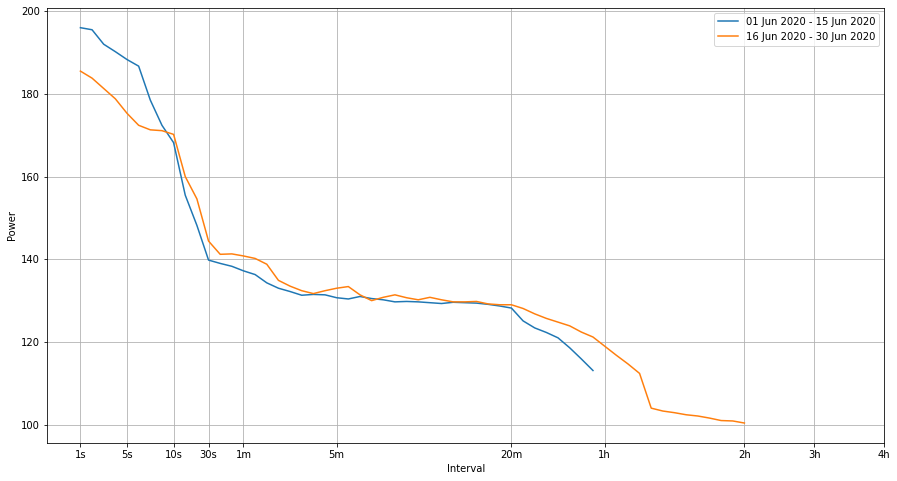

In [107]:
biweekly = [('2020-06-01', '2020-06-15'),
            ('2020-06-16', '2020-06-30'),
            ('2020-07-01', '2020-07-15'),
            ('2020-07-16', '2020-07-31'),
           ]
weekly = [('2020-06-01', '2020-06-07'),
          ('2020-06-08', '2020-06-14'),
          ('2020-06-15', '2020-06-21'),
          ('2020-06-22', '2020-06-28'),
         ]
yearly = [('2013-01-01', '2013-12-31'),
          ('2014-01-01', '2014-12-31'),
          ('2015-01-01', '2015-12-31'),
          ('2016-01-01', '2016-12-31'),
          ('2017-01-01', '2017-12-31'),
          ('2018-01-01', '2018-12-31'),
          ('2019-01-01', '2019-12-31'),
          ('2020-01-01', '2020-12-31'),
        ]
zt.plot_power_curves(biweekly, max_interval=4*3600, max_hr=128)

## Best Route

In [94]:
zt.best_cycling_route(115, '0:45:00')

Training with 10 datapoints from 2020-06-12 06:55:48
Mean error: 5.1 minutes
Mean error: 4.7%


,,done,total distance,distance,lead-in,elevation,badge,best activity,best pred xp,power_avg,pred avg speed,pred minutes,best pred xp/minutes
world,route,,,,,,,,,,,,
Watopia,Jungle Circuit,0,13.6,7.9,5.7,79,260,interval,772,115,21.4,38.1,20.3
New York,Lady Liberty,0,12.7,12.3,0.4,197,240,interval,752,115,17.7,43.0,17.5
Watopia,Volcano Flat,0,12.8,12.3,0.5,46,240,interval,752,115,22.1,34.7,21.7
New York,Astoria Line 8,0,11.9,11.5,0.4,141,230,interval,742,115,18.6,38.3,19.4
Yorkshire,Tour of Tewit Well,0,10.4,10.4,0.0,200,210,interval,722,115,16.1,38.7,18.7
Watopia,Flat Route,0,10.8,10.3,0.5,54,200,interval,712,115,20.8,31.2,22.8
New York,Park Perimeter Loop,0,10.2,9.8,0.4,126,190,interval,702,115,17.9,34.1,20.6
Richmond,Cobbled Climbs,0,9.5,9.2,0.3,126,180,interval,692,115,17.4,32.8,21.1
Watopia,Hilly Route,0,9.6,9.1,0.5,100,180,interval,692,115,18.3,31.5,22.0
